# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import (weather_api_key,g_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

c:\Users\chun\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
#print((list(lat_lngs)))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

594

In [3]:
cities2=[]
for i in range(2):
    cities2.append(cities[i+2])
cities2

['nikolskoye', 'bengkulu']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
cities_list=[]
lat_list=[]
lng_list=[]
temp_list=[]
humi_list=[]
clou_list=[]
wind_list=[]
coun_list=[]
date_list=[]
i=1
we_url='https://api.openweathermap.org/data/2.5/weather?'
ge_url='https://maps.googleapis.com/maps/api/geocode/json?'
for city in cities:
    ge_params={
        'address':city,
        'key':g_key
    }
    city_js=requests.get(ge_url,params=ge_params).json()
    try:
        
        lat=city_js['results'][0]['geometry']['location']['lat']
        lng=city_js['results'][0]['geometry']['location']['lng']
        country=city_js['results'][0]['address_components'][2]['long_name']
        cities_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
        coun_list.append(country)
    except:
        print(f'City {city} not found. Skipping...')
        continue

    we_params={
        'lat':lat,
        'lon':lng,
        'units':'metric',
        'appid':weather_api_key
    }
    weather_js=requests.get(we_url,params=we_params).json()
    try:
        temp=weather_js['main']['temp_max']
        humi=weather_js['main']['humidity']
        clou=weather_js['clouds']['all']
        wind=weather_js['wind']['speed']
        date=weather_js['dt']
        temp_list.append(temp)
        humi_list.append(humi)
        clou_list.append(clou)
        wind_list.append(wind)
        date_list.append(date)
    except:
        print(f'City {city} weather not found. Skipping...')
        continue
    print(f'Processing Record {i} | {city}')
    i=i+1
    if (i > 500):
        print(f'500 cities is enough')
        break


Processing Record 1 | port alfred
Processing Record 2 | villa carlos paz
Processing Record 3 | nikolskoye
Processing Record 4 | bengkulu
Processing Record 5 | yellowknife
Processing Record 6 | tasiilaq
Processing Record 7 | vaini
Processing Record 8 | kieta
Processing Record 9 | new norfolk
Processing Record 10 | necochea
Processing Record 11 | albany
Processing Record 12 | taolanaro
Processing Record 13 | hermanus
Processing Record 14 | ushuaia
Processing Record 15 | laguna
Processing Record 16 | port shepstone
City dali not found. Skipping...
Processing Record 17 | port lincoln
Processing Record 18 | pueblo nuevo
Processing Record 19 | chuy
Processing Record 20 | te anau
Processing Record 21 | kavieng
Processing Record 22 | san quintin
Processing Record 23 | anadyr
Processing Record 24 | marolambo
Processing Record 25 | antalaha
Processing Record 26 | ostrovnoy
Processing Record 27 | oranjemund
Processing Record 28 | atuona
City vostok not found. Skipping...
Processing Record 29 | bu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df=pd.DataFrame({'City':cities_list,'Lat':lat_list,'Lng':lng_list,'Max Temp':temp_list,'Humidity':humi_list,'Cloudiness':clou_list,'Wind Speed':wind_list,'Country':coun_list,'Date':date_list}) 

cities_df.to_csv(output_data_file, index=False)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.586407,26.885145,17.37,96,100,6.81,Eastern Cape,1665964812
1,villa carlos paz,-31.420783,-64.499214,18.14,60,14,3.58,Cordoba,1665964814
2,nikolskoye,55.198160,166.001537,4.87,52,29,4.32,Kamchatka Krai,1665964816
3,bengkulu,-3.792845,102.260764,24.44,88,100,1.43,Bengkulu,1665964817
4,yellowknife,62.453972,-114.371789,1.51,65,73,7.34,Fort Smith Region,1665964818
...,...,...,...,...,...,...,...,...,...
495,launceston,-41.439068,147.135767,14.73,62,40,3.60,Tasmania,1665965377
496,upington,-28.395268,21.236808,19.69,56,95,3.42,Northern Cape,1665965379
497,assiniboia,49.633567,-105.991792,5.77,25,76,2.73,Canada,1665965380
498,vyshkov,52.479242,31.684862,4.36,66,100,4.40,Bryansk Oblast,1665965382


In [6]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,19.305878,11.177218,16.961060,72.704000,59.416000,3.522940,1.665965e+09
std,32.994214,92.397665,10.281101,20.101655,38.507097,2.499399,1.646517e+02
min,-54.801912,-179.412597,-19.060000,9.000000,0.000000,0.000000,1.665965e+09
25%,-8.005415,-69.209553,11.922500,63.000000,20.000000,1.540000,1.665965e+09
50%,21.359271,16.073028,19.440000,78.000000,73.500000,2.960000,1.665965e+09
75%,47.051992,88.071813,25.025000,88.000000,98.000000,4.927500,1.665965e+09
max,78.223172,179.348539,32.530000,100.000000,100.000000,13.840000,1.665965e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data=cities_df.loc[cities_df['Humidity']<=100]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.586407,26.885145,17.37,96,100,6.81,Eastern Cape,1665964812
1,villa carlos paz,-31.420783,-64.499214,18.14,60,14,3.58,Cordoba,1665964814
2,nikolskoye,55.198160,166.001537,4.87,52,29,4.32,Kamchatka Krai,1665964816
3,bengkulu,-3.792845,102.260764,24.44,88,100,1.43,Bengkulu,1665964817
4,yellowknife,62.453972,-114.371789,1.51,65,73,7.34,Fort Smith Region,1665964818
...,...,...,...,...,...,...,...,...,...
495,launceston,-41.439068,147.135767,14.73,62,40,3.60,Tasmania,1665965377
496,upington,-28.395268,21.236808,19.69,56,95,3.42,Northern Cape,1665965379
497,assiniboia,49.633567,-105.991792,5.77,25,76,2.73,Canada,1665965380
498,vyshkov,52.479242,31.684862,4.36,66,100,4.40,Bryansk Oblast,1665965382


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
import datetime
today=datetime.date.today()

## Latitude vs. Temperature Plot

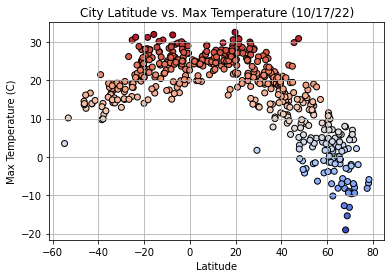

In [30]:
lat_temp_df=clean_city_data[['Lat','Max Temp']]
#lat_temp_df.plot.scatter(x='Lat',y='Max Temp',grid=True,)
plt.scatter(x=lat_temp_df['Lat'],y=lat_temp_df['Max Temp'],edgecolors='black',c=lat_temp_df['Max Temp'],cmap='coolwarm')
plt.grid(visible=True)

plt.title(f"City Latitude vs. Max Temperature ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.savefig('../output_data/Fig1.png')
plt.show()

### ___The above scatter plot show some relationship between latitude and the max temperature.___

## Latitude vs. Humidity Plot

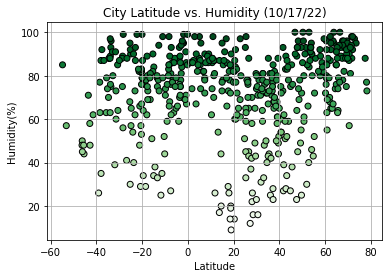

In [43]:
lat_temp_df=clean_city_data[['Lat','Humidity']]
#lat_temp_df.plot.scatter(x='Lat',y='Humidity',grid=True)
plt.scatter(x=lat_temp_df['Lat'],y=lat_temp_df['Humidity'],edgecolors='black',c=lat_temp_df['Humidity'],cmap='Greens')
plt.grid(visible=True)
plt.title(f"City Latitude vs. Humidity ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.savefig('../output_data/Fig2.png')
plt.show()

#### ___The above scatter plot show some relationship between latitude and humidity.___

## Latitude vs. Cloudiness Plot

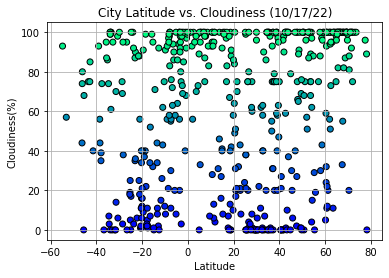

In [54]:
lat_temp_df=clean_city_data[['Lat','Cloudiness']]
#lat_temp_df.plot.scatter(x='Lat',y='Cloudiness',grid=True) 
plt.scatter(x=lat_temp_df['Lat'],y=lat_temp_df['Cloudiness'],edgecolors='black',c=lat_temp_df['Cloudiness'],cmap='winter')
plt.grid(visible=True)
plt.title(f"City Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

plt.savefig('../output_data/Fig3.png')
plt.show()

#### ___The above scatter plot show some relationship between latitude and cloudiness.___

## Latitude vs. Wind Speed Plot

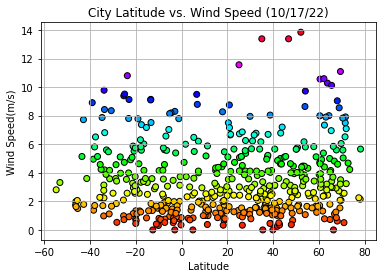

In [82]:
lat_temp_df=clean_city_data[['Lat','Wind Speed']]
#lat_temp_df.plot.scatter(x='Lat',y='Wind Speed',grid=True)
plt.scatter(x=lat_temp_df['Lat'],y=lat_temp_df['Wind Speed'],edgecolors='black',c=lat_temp_df['Wind Speed'],cmap='hsv')
plt.grid(visible=True)
plt.title(f"City Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

plt.savefig('../output_data/Fig4.png')
plt.show()

#### ___The above scatter plot show some relationship between latitude and wind speed.___

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

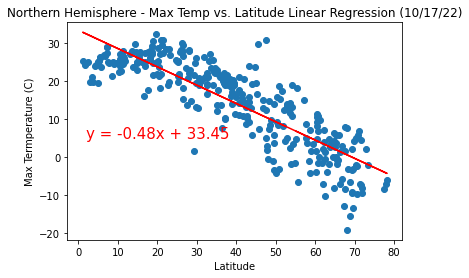

In [14]:
from scipy.stats import linregress

lat_temp_df1=clean_city_data[['Lat','Max Temp']]
lat_temp_n_df=lat_temp_df1[lat_temp_df1['Lat'] > 0]
lat_temp_n_df.plot.scatter(x='Lat',y='Max Temp')

x_values = lat_temp_n_df['Lat']
y_values = lat_temp_n_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Termperature (C)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

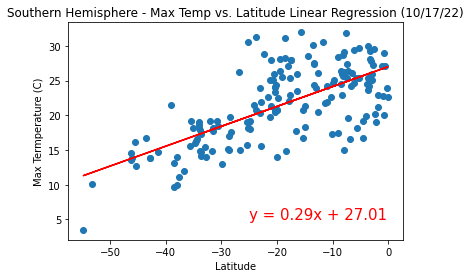

In [15]:
from scipy.stats import linregress

lat_temp_df1=clean_city_data[['Lat','Max Temp']]
lat_temp_s_df=lat_temp_df1[lat_temp_df1['Lat'] < 0]
lat_temp_s_df.plot.scatter(x='Lat',y='Max Temp')

x_values = lat_temp_s_df['Lat']
y_values = lat_temp_s_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Termperature (C)')
plt.show()

#### ___Approach the equator, the weather gets hotter than high latitude.___

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

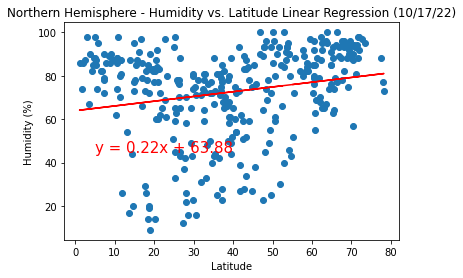

In [16]:
from scipy.stats import linregress

lat_humi_df1=clean_city_data[['Lat','Humidity']]
lat_humi_n_df=lat_humi_df1[lat_humi_df1['Lat'] > 0]
lat_humi_n_df.plot.scatter(x='Lat',y='Humidity')

x_values = lat_humi_n_df['Lat']
y_values = lat_humi_n_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

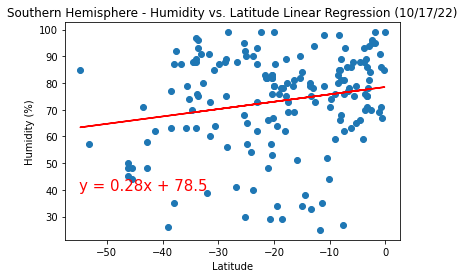

In [17]:
from scipy.stats import linregress

lat_humi_df1=clean_city_data[['Lat','Humidity']]
lat_humi_s_df=lat_humi_df1[lat_humi_df1['Lat'] < 0]
lat_humi_s_df.plot.scatter(x='Lat',y='Humidity')

x_values = lat_humi_s_df['Lat']
y_values = lat_humi_s_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#### ___The humidity almost is not relationship with latitude.___

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

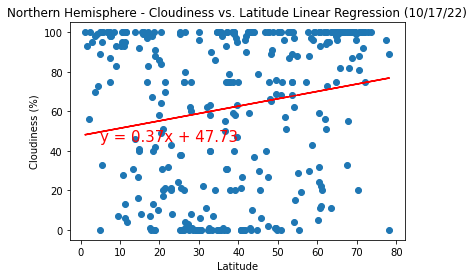

In [18]:
from scipy.stats import linregress

lat_clou_df1=clean_city_data[['Lat','Cloudiness']]
lat_clou_n_df=lat_clou_df1[lat_clou_df1['Lat'] > 0]
lat_clou_n_df.plot.scatter(x='Lat',y='Cloudiness')

x_values = lat_clou_n_df['Lat']
y_values = lat_clou_n_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

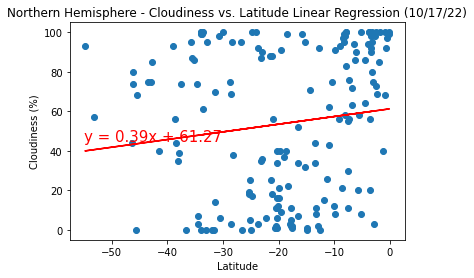

In [19]:
from scipy.stats import linregress

lat_clou_df1=clean_city_data[['Lat','Cloudiness']]
lat_clou_s_df=lat_clou_df1[lat_clou_df1['Lat'] < 0]
lat_clou_s_df.plot.scatter(x='Lat',y='Cloudiness')

x_values = lat_clou_s_df['Lat']
y_values = lat_clou_s_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### ___According scatter plot, cloudiness is not relationship with latitude.___

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

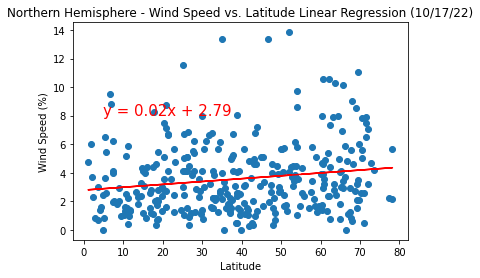

In [20]:
from scipy.stats import linregress

lat_wind_df1=clean_city_data[['Lat','Wind Speed']]
lat_wind_n_df=lat_wind_df1[lat_wind_df1['Lat'] > 0]
lat_wind_n_df.plot.scatter(x='Lat',y='Wind Speed')

x_values = lat_wind_n_df['Lat']
y_values = lat_wind_n_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

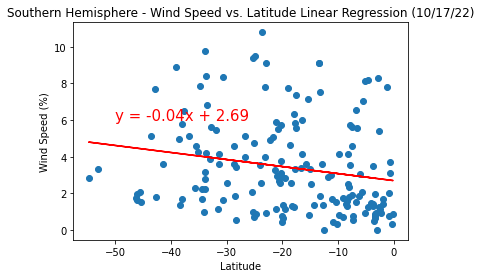

In [21]:
from scipy.stats import linregress

lat_wind_df1=clean_city_data[['Lat','Wind Speed']]
lat_wind_s_df=lat_wind_df1[lat_wind_df1['Lat'] < 0]
lat_wind_s_df.plot.scatter(x='Lat',y='Wind Speed')

x_values = lat_wind_s_df['Lat']
y_values = lat_wind_s_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({today.strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.show()

#### ___According scatter plot, wind speed is not relationship with latitude.___